In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
%pip install openpyxl
import openpyxl

Note: you may need to restart the kernel to use updated packages.


In [48]:
# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file_path = r"C:\Users\Hp\Documents\KPMG_VI.xlsx"

# Load the Excel file
workbook = openpyxl.load_workbook(excel_file_path)

# Get the names of all sheets in the Excel file
sheet_names = workbook.sheetnames

print(sheet_names)


['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [49]:
# combine 2 of the shets to form a  dataframe based on a primary key 

# Read the sheets you want to combine into DataFrames.
sheet1_df = pd.read_excel(excel_file_path, sheet_name='Transactions')
sheet2_df = pd.read_excel(excel_file_path, sheet_name='CustomerDemographic')

# Replace 'primary_key_column' with the actual name of the primary key column.
merged_df = sheet1_df.merge(sheet2_df, on='customer_id', how='inner')

merged_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Anthony,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,O'Donnell,Female,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,O'Donnell,Female,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,19854,68,130,2017-02-02,1.0,Approved,OHM Cycles,Standard,medium,medium,...,Delete,Male,32,1997-07-18 00:00:00,Chemical Engineer,Manufacturing,Mass Customer,N,No,1.0
19993,17966,17,2789,2017-12-06,0.0,Approved,Solex,Standard,high,medium,...,Bucksey,Female,66,1992-11-30 00:00:00,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0
19994,18462,80,2789,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,...,Bucksey,Female,66,1992-11-30 00:00:00,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0
19995,17981,69,3446,2017-12-26,1.0,Approved,Giant Bicycles,Road,medium,medium,...,Tidy,Male,8,1967-01-30 00:00:00,Structural Engineer,Manufacturing,Mass Customer,N,No,14.0


In [50]:
# Drop the 'transaction_id' and 'product_id' columns from the merged DataFrame.
merged_df.drop(['transaction_id', 'product_id'], axis=1, inplace=True)


In [6]:
# Sort the DataFrame by the 'customer_id' column in ascending order.
merged_df = merged_df.sort_values(by='customer_id', ascending=True)

merged_df

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
608,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,...,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
609,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,...,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
599,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,...,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
600,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,...,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
601,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,...,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,...,Fleeman,Female,71,1967-07-21 00:00:00,NaN,Entertainment,Affluent Customer,N,No,17.0
11307,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.90,...,Fleeman,Female,71,1967-07-21 00:00:00,NaN,Entertainment,Affluent Customer,N,No,17.0
11303,3500,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,...,Fleeman,Female,71,1967-07-21 00:00:00,NaN,Entertainment,Affluent Customer,N,No,17.0
11302,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,...,Fleeman,Female,71,1967-07-21 00:00:00,NaN,Entertainment,Affluent Customer,N,No,17.0


In [7]:
# Create a new DataFrame without rows where 'order_status' is 'Cancelled'.

filtered_df = merged_df[merged_df['order_status'] != 'Cancelled']

In [8]:
filtered_df = merged_df[merged_df['deceased_indicator'] != 'Y']

In [9]:
# Check the number of null values in each column.
null_counts = filtered_df.isnull().sum()

# Display the null value counts for each column.
print(null_counts)


customer_id                               0
transaction_date                          0
online_order                            360
order_status                              0
brand                                   197
product_line                            197
product_class                           197
product_size                            197
list_price                                0
standard_cost                           197
product_first_sold_date                 197
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2394
job_industry_category                  3229
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                  446
dtype: int64


In [10]:
# Assuming 'filtered_df' is your DataFrame.
# Drop rows with null values in the 'standard_cost' column.
filtered_df = filtered_df.dropna(subset=['standard_cost'])
filtered_df = filtered_df.dropna(subset=['online_order'])
filtered_df = filtered_df.dropna(subset=['DOB'])

In [11]:
null_counts = filtered_df.isnull().sum()

# Display the null value counts for each column.
print(null_counts)

customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
first_name                                0
last_name                               610
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                       0
job_title                              2278
job_industry_category                  3135
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                    0
dtype: int64


In [12]:
filtered_df

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
608,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,...,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
609,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,...,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
599,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,...,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
600,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,...,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
601,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,...,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,...,Fleeman,Female,71,1967-07-21 00:00:00,NaN,Entertainment,Affluent Customer,N,No,17.0
11307,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.90,...,Fleeman,Female,71,1967-07-21 00:00:00,NaN,Entertainment,Affluent Customer,N,No,17.0
11303,3500,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,...,Fleeman,Female,71,1967-07-21 00:00:00,NaN,Entertainment,Affluent Customer,N,No,17.0
11302,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,...,Fleeman,Female,71,1967-07-21 00:00:00,NaN,Entertainment,Affluent Customer,N,No,17.0


In [13]:
# Assuming 'filtered_df' is your DataFrame.
# Create a new 'profit' column.
filtered_df['profit'] = filtered_df['list_price'] - filtered_df['standard_cost']

In [16]:
df = filtered_df

In [51]:
# Define the file path where you want to save the Excel file
file_path = r"C:\Users\Hp\Desktop\python.xlsx"  

# Save the DataFrame to an Excel file
df.to_excel(file_path, index=False) 

print(f'DataFrame saved to {file_path}')


DataFrame saved to C:\Users\Hp\Desktop\python.xlsx


In [32]:
# Assuming df is your DataFrame
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Group by 'customer_id' and count unique transaction dates
freq = df.groupby('customer_id')['transaction_date'].nunique().reset_index()

# Rename the resulting column to 'Frequency'
freq = freq.rename(columns={'transaction_date': 'Frequency'})

# Now, 'freq' contains the frequency values for each customer

# Recency
day = "2023-09-27"
day = pd.to_datetime(day)
df['transaction_date'] = pd.to_datetime(df["transaction_date"])

recency = df.groupby(["customer_id"]).agg({"transaction_date": lambda x: ((day - x.max()).days)})

# Monetary
money = df.groupby(["customer_id"])[["list_price"]].sum()
money = money.sort_values(by='list_price', ascending=False)

# Concatenate recency, freq, and money DataFrames
RFM = pd.concat([recency, freq.set_index('customer_id'), money], axis=1)

# Rename the columns
RFM.columns = ["Recency", "Frequency", "Monetary"]

# Reset the index to have 'customer_id' as a regular column
RFM.reset_index(inplace=True)

RFM.tail(10)


,customer_id,Recency,Frequency,Monetary
3404,3491,2286,4,3151.67
3405,3492,2177,3,4141.43
3406,3493,2190,6,10053.82
3407,3494,2101,4,5122.71
3408,3495,2110,7,8626.65
3409,3496,2353,4,4725.38
3410,3497,2149,3,3744.07
3411,3498,2224,6,5177.06
3412,3499,2148,7,7673.48
3413,3500,2241,6,4922.41


In [35]:
import warnings
warnings.filterwarnings('ignore')  # Permanently suppress warnings


In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

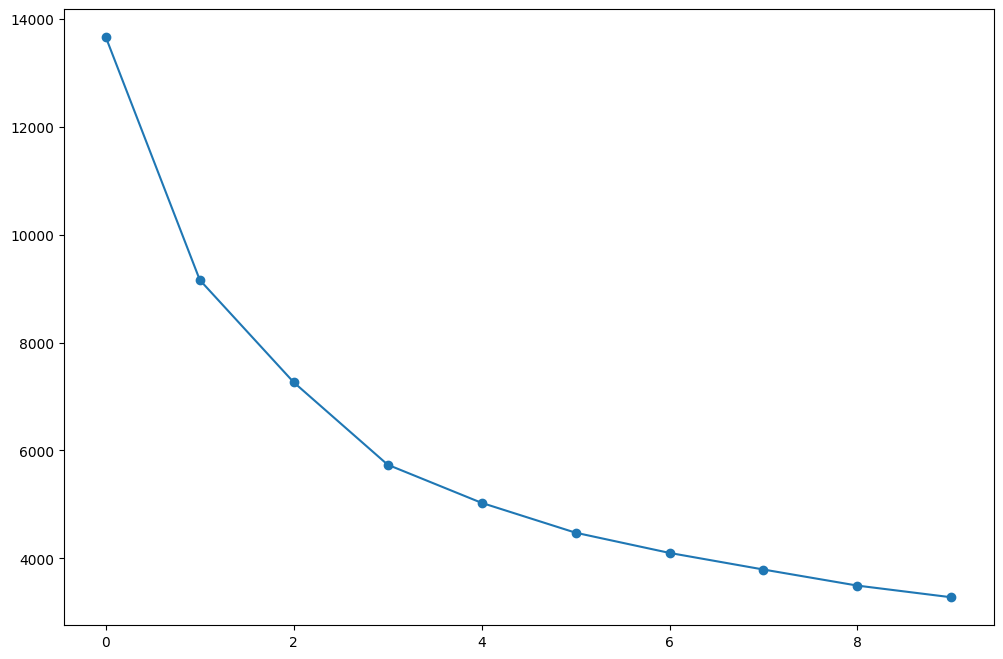

In [36]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o");

In [37]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

In [38]:
RFM

,customer_id,Recency,Frequency,Monetary,Clusters
0,1,2104,11,9084.45,3
1,2,2225,3,4149.07,2
2,3,2199,7,9525.22,3
3,4,2292,2,1047.72,2
4,5,2113,6,5903.20,1
...,...,...,...,...,...
3409,3496,2353,4,4725.38,2
3410,3497,2149,3,3744.07,1
3411,3498,2224,6,5177.06,1
3412,3499,2148,7,7673.48,3


In [40]:
final = RFM.groupby("Clusters")[["Recency", "Frequency", "Monetary"]].mean()
final


,Recency,Frequency,Monetary
Clusters,,,
1,2140.872127,4.560401,4779.671408
2,2266.330922,3.408680,3745.524268
3,2136.630584,7.954467,9305.858119


In [42]:
def func(row):
    if row["Clusters"]==1:
        return 'better'
    elif row["Clusters"]==2:
        return 'good'
    else:
        return 'best'

In [43]:
RFM['group']=RFM.apply(func, axis=1)

In [44]:
RFM

,customer_id,Recency,Frequency,Monetary,Clusters,group
0,1,2104,11,9084.45,3,best
1,2,2225,3,4149.07,2,good
2,3,2199,7,9525.22,3,best
3,4,2292,2,1047.72,2,good
4,5,2113,6,5903.20,1,better
...,...,...,...,...,...,...
3409,3496,2353,4,4725.38,2,good
3410,3497,2149,3,3744.07,1,better
3411,3498,2224,6,5177.06,1,better
3412,3499,2148,7,7673.48,3,best


In [45]:
result=RFM.group.value_counts()

In [46]:
result

group
better    1697
best      1164
good       553
Name: count, dtype: int64

<Axes: ylabel='group'>

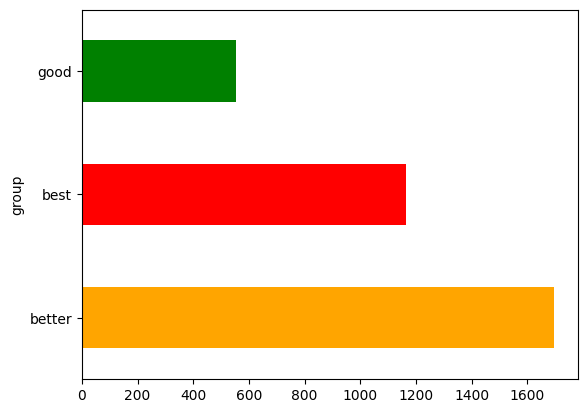

In [47]:
result.plot(kind="barh", color=["Orange","Red","Green"])